## Overview

## Business Problem

## Data Understanding

#### Building Structure Data
| Feature | Description| Type|
|:-------| :-------| :-------|
|building_id|	A unique ID that identifies a unique building from the survey|	Text|
|district_id|	District where the building is located|	Text|
|vdcmun_id|	Municipality where the building is located|	Text|
|ward_id|	Ward Number in which the building is located|	Text|
|count_floors_pre_eq|	Number of floors that the building had before the earthquake|	Number|
|count_floors_post_eq|	Number of floors that the building had after the earthquake|	Number|
|age_building|	Age of the building (in years)|	Number|
|plinth_area_sq_ft|	Plinth area of the building (in square feet)|	Number|
|height_ft_pre_eq|	Height of the building before the earthquake (in feet)|	Number|
|height_ft_post_eq|	Height of the building after the earthquake (in feet)|	Number|
|land_surface_condition|	Surface condition of the land in which the building is built|	Categorical|
|foundation_type|	Type of foundation used in the building|	Categorical|
|roof_type|	Type of roof used in the building|	Categorical|
|ground_floor_type|	Ground floor type|	Categorical|
|other_floor_type|	Type of construction used in other floors (except ground floor and roof)|	Categorical|
|position|	Position of the building|	Categorical|
|plan_configuration|	Building plan configuration|	Categorical|
|has_superstructure_adobe_mud|	Flag variable that indicates if the superstructure of the building is made of Adobe/Mud|	Boolean|
|has_superstructure_mud_mortar_stone| Flag variable that indicates if the superstructure of the building is made of Mud Mortar - Stone|	Boolean|
|has_superstructure_stone_flag|	Flag variable that indicates if the superstructure of the building is made of Stone	Boolean
|has_superstructure_cement_mortar_stone|	Flag variable that indicates if the superstructure of the building is made of Stone|	Boolean|
|has_superstructure_mud_mortar_brick|	Flag variable that indicates if the superstructure of the building is made of Cement Mortar - Stone|	Boolean|
|has_superstructure_cement_mortar_brick|	Flag variable that indicates if the superstructure of the building is made of Mud Mortar - Brick|	Boolean|
|has_superstructure_timber|	Flag variable that indicates if the superstructure of the building is made of Timber|	Boolean|
|has_superstructure_bamboo|	Flag variable that indicates if the superstructure of the building is made of Bamboo|	Boolean|
|has_superstructure_rc_non_engineered|	Flag variable that indicates if the superstructure of the building is made of RC (Non Engineered)|	Boolean|
|has_superstructure_rc_engineered|	Flag variable that indicates if the superstructure of the building is made of RC (Engineered)|	Boolean|
|has_superstructure_other| Flag variable that indicates if the superstructure of the building is made of any other material |Boolean|
|condition_post_eq|	Actual contition of the building after the earthquake|	Categorical|
|damage_grade|	Damage grade assigned to the building by the surveyor after assessment|	Categorical|
|technical_solution_proposed|	Technical solution proposed by the surveyor after assessment|	Categorical|


There are 4 features that have values about the building after the earthquake: count_floors_post_eq, height_ft_post_eq, condition_post_eq, technical_solution_proposed. This features will most likely be droped becuase target is predicting the damage grade for a build before an earthquake.

#### Building Ownership and Use Data
| Feature | Description| Type|
|:-------| :-------| :-------|
|building_id|	A unique ID that identifies every individual building|	Text|
|district_id|	District where the building is located|	Text|
|vdcmun_id|	Municipality where the building is located|	Text|
|ward_id|	Ward Number in which the building is located|	Text|
|legal_ownership_status|	Legal ownership status of the land in which the building was built|	Categorical|
|count_families|	Number of families in the building|	Number|
|has_secondary_use|	Flag variable that indicates if the building is used for any secondary purpose|	Boolean|
|has_secondary_use_agriculture|	Flag variable that indicates if the building is secondarily used for agricultural purpose|	Boolean|
|has_secondary_use_hotel|	Flag variable that indicates if the building is secondarily used as hotel|	Boolean|
|has_secondary_use_rental|	Flag variable that indicates if the building is secondarily used for rental purpose|	Boolean|
|has_secondary_use_institution|	Flag variable that indicates if the building is secondarily used for institutional purpose|	Boolean|
|has_secondary_use_school|	Flag variable that indicates if the building is secondarily used as school|	Boolean|
|has_secondary_use_industry|	Flag variable that indicates if the building is secondarily used for industrial purpose|	Boolean|
|has_secondary_use_health_post|	Flag variable that indicates if the building is secondarily used as health post|	Boolean|
|has_secondary_use_gov_office|	Flag variable that indicates if the building is secondarily used as government office|	Boolean|
|has_secondary_use_use_police|	Flag variable that indicates if the building is secondarily used as police station|	Boolean|
|has_secondary_use_other|	Flag variable that indicates if the building is secondarily used for other purpose|	Boolean|

## Data Preparation

### Import Libraries and Tools

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

### Read in the Datasets

In [2]:
df_building_structure = pd.read_csv('Data/csv_building_structure.csv')
df_building_structure

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


In [3]:
df_building_ownership_and_use = pd.read_csv('Data/csv_building_ownership_and_use.csv')
df_building_ownership_and_use

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762102,366709001251,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762103,366709001261,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762104,366709001271,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


### Merging Datasets Into One

In [4]:
df = df_building_structure.merge(df_building_ownership_and_use, on=['building_id', 'district_id', 'vdcmun_id', 'ward_id'])
df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762102,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762103,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762104,366709001271,36,3603,360302,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


### Checking for Missing Values

In [5]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [6]:
df.dropna(inplace=True)
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [7]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


### Checking Feater Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762093 entries, 0 to 762105
Data columns (total 44 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762093 non-null  int64  
 1   district_id                             762093 non-null  int64  
 2   vdcmun_id                               762093 non-null  int64  
 3   ward_id                                 762093 non-null  int64  
 4   count_floors_pre_eq                     762093 non-null  int64  
 5   count_floors_post_eq                    762093 non-null  int64  
 6   age_building                            762093 non-null  int64  
 7   plinth_area_sq_ft                       762093 non-null  int64  
 8   height_ft_pre_eq                        762093 non-null  int64  
 9   height_ft_post_eq                       762093 non-null  int64  
 10  land_surface_condition                  7620

Some of the features that are mean to be Booleans are classaffied as int64.

In [9]:
bool_list = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
             'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
             'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
             'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
             'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
             'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 
             'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 
             'has_secondary_use_other']

In [10]:
for name in bool_list:
    df[name] = df[name].astype('bool')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762093 entries, 0 to 762105
Data columns (total 44 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762093 non-null  int64  
 1   district_id                             762093 non-null  int64  
 2   vdcmun_id                               762093 non-null  int64  
 3   ward_id                                 762093 non-null  int64  
 4   count_floors_pre_eq                     762093 non-null  int64  
 5   count_floors_post_eq                    762093 non-null  int64  
 6   age_building                            762093 non-null  int64  
 7   plinth_area_sq_ft                       762093 non-null  int64  
 8   height_ft_pre_eq                        762093 non-null  int64  
 9   height_ft_post_eq                       762093 non-null  int64  
 10  land_surface_condition                  7620

### Droping Features Post Earthquake

In [12]:
df.drop(['count_floors_post_eq', 'height_ft_post_eq', 'condition_post_eq', 
         'technical_solution_proposed'], inplace=True, axis=1)

In [13]:
df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,False,True,False,False,False,False,False,True,False,False,False,Grade 3,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
1,120101000021,12,1207,120703,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,False,True,False,False,False,False,False,True,False,False,False,Grade 5,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
2,120101000031,12,1207,120703,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 2,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
3,120101000041,12,1207,120703,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 2,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
4,120101000051,12,1207,120703,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 1,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,60,165,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 5,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
762102,366709001251,36,3603,360302,2,35,342,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 5,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
762103,366709001261,36,3603,360302,2,35,342,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 5,Private,1.0,False,False,False,False,False,False,False,False,False,False,False
762104,366709001271,36,3603,360302,2,19,306,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Grade 5,Private,1.0,False,False,False,False,False,False,False,False,False,False,False


After droping the rows that had missing values the dataset when from 762106 rows to 762093 rows, so only lost 13 rows. And when the features that had values about post earthquake the dataset when from 44 columns to 40 columns.

## Exploratory Data Analysis

### Class Counts

Lets take a look at are target classes and see what kind of counts we have.

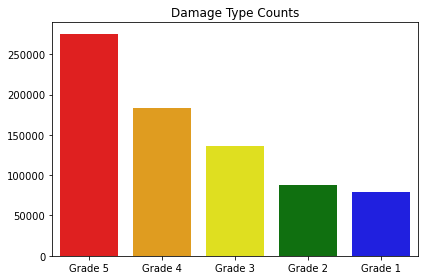

In [17]:
fig, ax = plt.subplots()

x = df['damage_grade'].value_counts().index
y = df['damage_grade'].value_counts().values

color = ['red','orange', 'yellow', 'green', 'blue']

ax = sns.barplot(x=x, y=y, palette=color)
ax.set_title('Damage Type Counts')

plt.tight_layout()
fig.savefig('Images/classes.png')

Looks like are classes are imbalance this may cuase an issues down the road when we start training are models.

## First Simple Model

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762093 entries, 0 to 762105
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762093 non-null  int64  
 1   district_id                             762093 non-null  int64  
 2   vdcmun_id                               762093 non-null  int64  
 3   ward_id                                 762093 non-null  int64  
 4   count_floors_pre_eq                     762093 non-null  int64  
 5   age_building                            762093 non-null  int64  
 6   plinth_area_sq_ft                       762093 non-null  int64  
 7   height_ft_pre_eq                        762093 non-null  int64  
 8   land_surface_condition                  762093 non-null  object 
 9   foundation_type                         762093 non-null  object 
 10  roof_type                               7620

In [25]:
X_fsm = df.drop(['building_id', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 
                     'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status',
                     'damage_grade'], axis=1)
y_fsm = df['damage_grade']

X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm = train_test_split(X_fsm, y_fsm, random_state=42, stratify=y_fsm)

In [26]:
fsm_dt = DecisionTreeClassifier(random_state=42, )
fsm_dt.fit(X_train_fsm, y_train_fsm)

DecisionTreeClassifier(random_state=42)

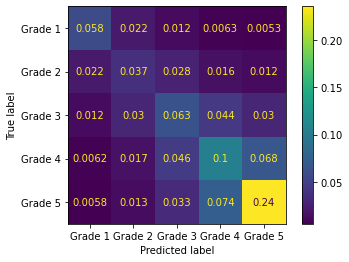

In [27]:
plot_confusion_matrix(fsm_dt, X_test_fsm, y_test_fsm, normalize='all');

In [29]:
y_hat_fsm = fsm_dt.predict(X_test_fsm)

In [28]:
print('  First Simple Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test_fsm, y_hat_fsm))
print('   Recall:', recall_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('Precision:', precision_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('       F1:', f1_score(y_test_fsm, y_hat_fsm, average = 'macro'))

  First Simple Model Scores
-----------------------------
 Accuracy: 0.4987140727677353
   Recall: 0.4640324139489902
Precision: 0.4632644712725603
       F1: 0.4635957266798815


## Preprocessing

In [14]:
df_values = df.drop(['building', 'damage_grade'], axis=1)
df_target = df['damage_grade']

## Modeling

## Conclusions

## Next Steps